In [ ]:
# If you assume that no-hitters are described as a Poisson process, then the time between 
# no-hitters is Exponentially distributed. As you have seen, the Exponential distribution 
# has a single parameter, which we will call ττ, the typical interval time. The value of the
# parameter ττ that makes the exponential distribution best match the data is the mean interval
# time (where time is in units of number of games) between no-hitters.

# Compute the value of this parameter from the data. Then, use np.random.exponential() to
# "repeat" the history of Major League Baseball by drawing inter-no-hitter times from an
# exponential distribution with the ττ you found and plot the histogram as an approximation to the PDF.

# Seed random number generator
np.random.seed(42)

# Compute mean no-hitter time: tau
tau = np.mean(nohitter_times)

# Draw out of an exponential distribution with parameter tau: inter_nohitter_time
inter_nohitter_time = np.random.exponential(tau, 100000)

# Plot the PDF and label axes
_ = plt.hist(inter_nohitter_time,
             bins = 50, normed = True, histtype = 'step')
_ = plt.xlabel('Games between no-hitters')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

In [1]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n = len(data) 

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n + 1) / n

    return x, y

In [ ]:
# Create an ECDF from real data: x, y
x, y = ecdf(nohitter_times)

# Create a CDF from theoretical samples: x_theor, y_theor
x_theor, y_theor = ecdf(inter_nohitter_time)

# Overlay the plots
plt.plot(x_theor, y_theor)
plt.plot(x, y, marker='.', linestyle='none')

# Margins and axis labels
plt.margins(0.02)
plt.xlabel('Games between no-hitters')
plt.ylabel('CDF')

# Show the plot
plt.show()


In [ ]:
# Plot the theoretical CDFs
plt.plot(x_theor, y_theor)
plt.plot(x, y, marker='.', linestyle='none')
plt.margins(0.02)
plt.xlabel('Games between no-hitters')
plt.ylabel('CDF')

# Take samples with half tau: samples_half
samples_half = np.random.exponential(tau/2, 10000)

# Take samples with double tau: samples_double
samples_double = np.random.exponential(2*tau, 10000)

# Generate CDFs from these samples
x_half, y_half = ecdf(samples_half)
x_double, y_double = ecdf(samples_double)

# Plot these CDFs as lines
_ = plt.plot(x_half, y_half)
_ = plt.plot(x_double, y_double)

# Show the plot
plt.show()

In [ ]:
# we will look at the correlation between female literacy and fertility (defined as the average
# number of children born per woman) throughout the world. For ease of analysis and interpretation,
# we will work with the illiteracy rate.

# It is always a good idea to do some EDA ahead of our analysis. To this end, plot the fertility
# versus illiteracy and compute the Pearson correlation coefficient. The Numpy array illiteracy
# has the illiteracy rate among females for most of the world's nations. The array fertility has
# the corresponding fertility data.

# Plot the illiteracy rate versus fertility
_ = plt.plot(illiteracy, fertility, marker='.', linestyle='none')

# Set the margins and label axes
plt.margins(0.02)
_ = plt.xlabel('percent illiterate')
_ = plt.ylabel('fertility')

# Show the plot
plt.show()

# Show the Pearson correlation coefficient
print(pearson_r(illiteracy, fertility))

In [ ]:
# We will assume that fertility is a linear function of the female illiteracy rate. 
# That is, f=ai+bf=ai+b, where aa is the slope and bb is the intercept. We can think
# of the intercept as the minimal fertility rate, probably somewhere between one and two.
# The slope tells us how the fertility rate varies with illiteracy. We can find the
# best fit line using np.polyfit().

# Plot the illiteracy rate versus fertility
_ = plt.plot(illiteracy, fertility, marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.xlabel('percent illiterate')
_ = plt.ylabel('fertility')

# Perform a linear regression using np.polyfit(): a, b
a, b = np.polyfit(illiteracy, fertility, 1)

# Print the results to the screen
print('slope =', a, 'children per woman / percent illiterate')
print('intercept =', b, 'children per woman')

# Make theoretical line to plot
x = np.array([0,100])
y = a * x + b

# Add regression line to your plot
_ = plt.plot(x, y)

# Draw the plot
plt.show()


'''
<script.py> output:
    slope = 0.0497985480906 children per woman / percent illiterate
    intercept = 1.88805061064 children per woman
'''

In [ ]:
# The function np.polyfit() that you used to get your regression parameters finds the optimal
# slope and intercept. It is optimizing the sum of the squares of the residuals, also known as
# RSS (for residual sum of squares). In this exercise, you will plot the function that is being
# optimized, the RSS, versus the slope parameter a. To do this, fix the intercept to be what you
# found in the optimization. Then, plot the RSS vs. the slope. Where is it minimal?

# Specify slopes to consider: a_vals
a_vals = np.linspace(0, 0.1, 200)

# Initialize sum of square of residuals: rss
rss = np.empty_like(a_vals)

# Compute sum of square of residuals for each value of a_vals
for i, a in enumerate(a_vals):
    rss[i] = np.sum((fertility - a*illiteracy - b)**2)

# Plot the RSS
plt.plot(a_vals, rss, '-')
plt.xlabel('slope (children per woman / percent illiterate)')
plt.ylabel('sum of square of residuals')

plt.show()

0.500090909091 3.00009090909


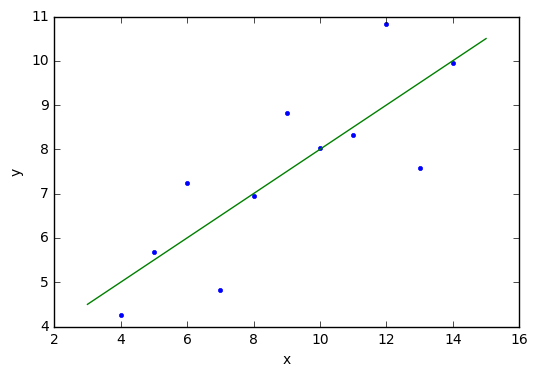

In [14]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([ 10.,   8.,  13.,   9.,  11.,  14.,   6.,   4.,  12.,   7.,   5.])
y = np.array([  8.04,   6.95,   7.58,   8.81,   8.33,   9.96,   7.24,   4.26,
        10.84,   4.82,   5.68])

# Perform linear regression: a, b
a, b = np.polyfit(x,y,1)

# Print the slope and intercept
print(a, b)

# Generate theoretical x and y data: x_theor, y_theor
x_theor = np.array([3, 15])
y_theor = a * x_theor + b

# Plot the Anscombe data and theoretical line
_ = plt.plot(x,y,marker = '.', linestyle = 'none')
_ = plt.plot(x_theor, y_theor)

# Label the axes
plt.xlabel('x')
plt.ylabel('y')

# Show the plot
plt.show()


In [16]:
# Now, to verify that all four of the Anscombe data sets have the same slope and intercept from
# a linear regression, you will compute the slope and intercept for each set. The data are stored
# in lists; anscombe_x = [x1, x2, x3, x4] and anscombe_y = [y1, y2, y3, y4], where, for example,
# x2 and y2 are the xx and yy values for the second Anscombe data set.
from numpy import array

anscombe_x = [array([ 10.,   8.,  13.,   9.,  11.,  14.,   6.,   4.,  12.,   7.,   5.]),
 array([ 10.,   8.,  13.,   9.,  11.,  14.,   6.,   4.,  12.,   7.,   5.]),
 array([ 10.,   8.,  13.,   9.,  11.,  14.,   6.,   4.,  12.,   7.,   5.]),
 array([  8.,   8.,   8.,   8.,   8.,   8.,   8.,  19.,   8.,   8.,   8.])]

anscombe_y = [array([  8.04,   6.95,   7.58,   8.81,   8.33,   9.96,   7.24,   4.26,
         10.84,   4.82,   5.68]),
 array([ 9.14,  8.14,  8.74,  8.77,  9.26,  8.1 ,  6.13,  3.1 ,  9.13,
         7.26,  4.74]),
 array([  7.46,   6.77,  12.74,   7.11,   7.81,   8.84,   6.08,   5.39,
          8.15,   6.42,   5.73]),
 array([  6.58,   5.76,   7.71,   8.84,   8.47,   7.04,   5.25,  12.5 ,
          5.56,   7.91,   6.89])]

# Iterate through x,y pairs
for x, y in zip(anscombe_x , anscombe_y ):
    # Compute the slope and intercept: a, b
    a, b = np.polyfit(x,y,1)

    # Print the result
    print('slope:', a, 'intercept:', b)


slope: 0.500090909091 intercept: 3.00009090909
slope: 0.5 intercept: 3.00090909091
slope: 0.499727272727 intercept: 3.00245454545
slope: 0.499909090909 intercept: 3.00172727273


In [ ]:
# Unfortunately, you often will read and hear other data scientists using different terminology 
# for bootstrap samples and replicates. This is even more reason why we need everything to be
# clear and consistent for this course. So, before going forward discussing bootstrapping,
# let's get our terminology down. If we have a data set with nn repeated measurements, a bootstrap
# sample is an array of length nn that was drawn from the original data with replacement.
# What is a bootstrap replicate?

# A single value of a statistic computed from a bootstrap sample.

for _ in range(50):
    # Generate bootstrap sample: bs_sample
    bs_sample = np.random.choice(rainfall, size=len(rainfall))

    # Compute and plot ECDF from bootstrap sample
    x, y = ecdf(bs_sample)
    _ = plt.plot(x, y, marker='.', linestyle='none',
                 color='gray', alpha=0.1)

# Compute and plot ECDF from original data
x, y = ecdf(rainfall)
_ = plt.plot(x, y, marker='.')

# Make margins and label axes
plt.margins(0.02)
_ = plt.xlabel('yearly rainfall (mm)')
_ = plt.ylabel('ECDF')

# Show the plot
plt.show()


In [17]:
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data,func)

    return bs_replicates


In [ ]:
# it can be shown theoretically that under not-too-restrictive conditions, the value
# of the mean will always be Normally distributed. (This does not hold in general,
# just for the mean and a few other statistics.) The standard deviation of this distribution,
# called the standard error of the mean, or SEM, is given by the standard deviation of the data
# divided by the square root of the number of data points. I.e., for a data set,
# sem = np.std(data) / np.sqrt(len(data)). Using hacker statistics, you get this same result
# without the need to derive it, but you will verify this result from your bootstrap replicates.


# Take 10,000 bootstrap replicates of the mean: bs_replicates
bs_replicates = draw_bs_reps(rainfall, np.mean, 10000)

# Compute and print SEM
sem = np.std(rainfall) / np.sqrt(len(rainfall))
print(sem)

# Compute and print standard deviation of bootstrap replicates
bs_std = np.std(bs_replicates)
print(bs_std)

# Make a histogram of the results
_ = plt.hist(bs_replicates, bins=50, normed=True)
_ = plt.xlabel('mean annual rainfall (mm)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

In [ ]:
def draw_bs_reps(data, func, size=1):
    return np.array([bootstrap_replicate_1d(data, func) for _ in range(size)])

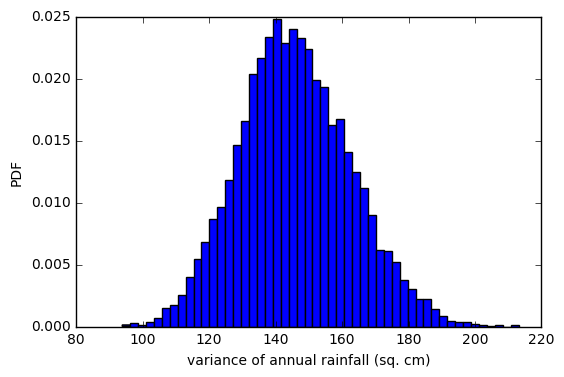

In [18]:
rainfall = array([  875.5,   648.2,   788.1,   940.3,   491.1,   743.5,   730.1,
         686.5,   878.8,   865.6,   654.9,   831.5,   798.1,   681.8,
         743.8,   689.1,   752.1,   837.2,   710.6,   749.2,   967.1,
         701.2,   619. ,   747.6,   803.4,   645.6,   804.1,   787.4,
         646.8,   997.1,   774. ,   734.5,   835. ,   840.7,   659.6,
         828.3,   909.7,   856.9,   578.3,   904.2,   883.9,   740.1,
         773.9,   741.4,   866.8,   871.1,   712.5,   919.2,   927.9,
         809.4,   633.8,   626.8,   871.3,   774.3,   898.8,   789.6,
         936.3,   765.4,   882.1,   681.1,   661.3,   847.9,   683.9,
         985.7,   771.1,   736.6,   713.2,   774.5,   937.7,   694.5,
         598.2,   983.8,   700.2,   901.3,   733.5,   964.4,   609.3,
        1035.2,   718. ,   688.6,   736.8,   643.3,  1038.5,   969. ,
         802.7,   876.6,   944.7,   786.6,   770.4,   808.6,   761.3,
         774.2,   559.3,   674.2,   883.6,   823.9,   960.4,   877.8,
         940.6,   831.8,   906.2,   866.5,   674.1,   998.1,   789.3,
         915. ,   737.1,   763. ,   666.7,   824.5,   913.8,   905.1,
         667.8,   747.4,   784.7,   925.4,   880.2,  1086.9,   764.4,
        1050.1,   595.2,   855.2,   726.9,   785.2,   948.8,   970.6,
         896. ,   618.4,   572.4,  1146.4,   728.2,   864.2,   793. ])

# Generate 10,000 bootstrap replicates of the variance: bs_replicates
bs_replicates = draw_bs_reps(rainfall, np.var, 10000)

# Put the variance in units of square centimeters
bs_replicates /= 100

# Make a histogram of the results
_ = plt.hist(bs_replicates, bins = 50, normed = True)
_ = plt.xlabel('variance of annual rainfall (sq. cm)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

95% confidence interval = [ 662.27320717  870.95298805] games


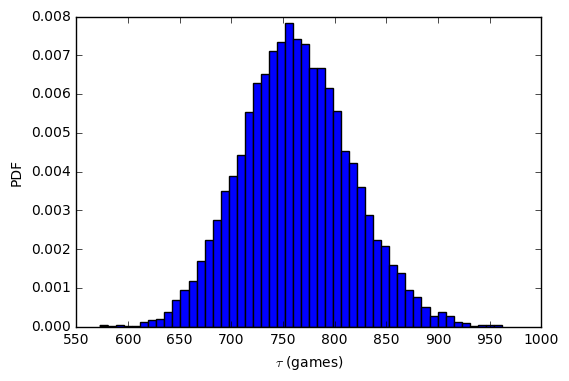

In [19]:
nohitter_times = array([ 843, 1613, 1101,  215,  684,  814,  278,  324,  161,  219,  545,
        715,  966,  624,   29,  450,  107,   20,   91, 1325,  124, 1468,
        104, 1309,  429,   62, 1878, 1104,  123,  251,   93,  188,  983,
        166,   96,  702,   23,  524,   26,  299,   59,   39,   12,    2,
        308, 1114,  813,  887,  645, 2088,   42, 2090,   11,  886, 1665,
       1084, 2900, 2432,  750, 4021, 1070, 1765, 1322,   26,  548, 1525,
         77, 2181, 2752,  127, 2147,  211,   41, 1575,  151,  479,  697,
        557, 2267,  542,  392,   73,  603,  233,  255,  528,  397, 1529,
       1023, 1194,  462,  583,   37,  943,  996,  480, 1497,  717,  224,
        219, 1531,  498,   44,  288,  267,  600,   52,  269, 1086,  386,
        176, 2199,  216,   54,  675, 1243,  463,  650,  171,  327,  110,
        774,  509,    8,  197,  136,   12, 1124,   64,  380,  811,  232,
        192,  731,  715,  226,  605,  539, 1491,  323,  240,  179,  702,
        156,   82, 1397,  354,  778,  603, 1001,  385,  986,  203,  149,
        576,  445,  180, 1403,  252,  675, 1351, 2983, 1568,   45,  899,
       3260, 1025,   31,  100, 2055, 4043,   79,  238, 3931, 2351,  595,
        110,  215,    0,  563,  206,  660,  242,  577,  179,  157,  192,
        192, 1848,  792, 1693,   55,  388,  225, 1134, 1172, 1555,   31,
       1582, 1044,  378, 1687, 2915,  280,  765, 2819,  511, 1521,  745,
       2491,  580, 2072, 6450,  578,  745, 1075, 1103, 1549, 1520,  138,
       1202,  296,  277,  351,  391,  950,  459,   62, 1056, 1128,  139,
        420,   87,   71,  814,  603, 1349,  162, 1027,  783,  326,  101,
        876,  381,  905,  156,  419,  239,  119,  129,  467])

# Draw bootstrap replicates of the mean no-hitter time (equal to tau): bs_replicates
bs_replicates = draw_bs_reps(nohitter_times, np.mean, 10000)

# Compute the 95% confidence interval: conf_int
conf_int = np.percentile(bs_replicates,[2.5, 97.5])

# Print the confidence interval
print('95% confidence interval =', conf_int, 'games')

# Plot the histogram of the replicates
_ = plt.hist(bs_replicates, bins=50, normed=True)
_ = plt.xlabel(r'$\tau$ (games)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()


In [25]:
def draw_bs_pairs_linreg(x, y, size=1):
    """Perform pairs bootstrap for linear regression."""

    # Set up array of indices to sample from: inds
    inds = np.arange(len(x))

    # Initialize replicates: bs_slope_reps, bs_intercept_reps
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x, bs_y, 1)

    return bs_slope_reps, bs_intercept_reps

[ 0.04383914  0.05557844]


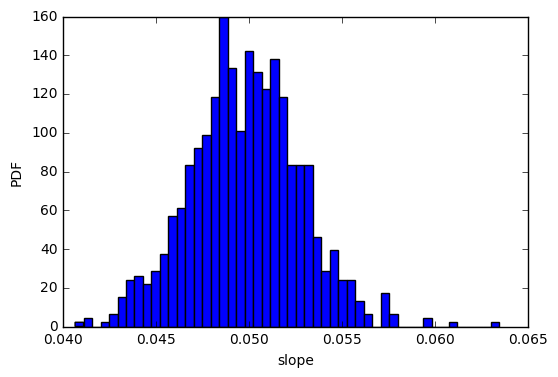

In [26]:
illiteracy = array([  9.5,  49.2,   1. ,  11.2,   9.8,  60. ,  50.2,  51.2,   0.6,
         1. ,   8.5,   6.1,   9.8,   1. ,  42.2,  77.2,  18.7,  22.8,
         8.5,  43.9,   1. ,   1. ,   1.5,  10.8,  11.9,   3.4,   0.4,
         3.1,   6.6,  33.7,  40.4,   2.3,  17.2,   0.7,  36.1,   1. ,
        33.2,  55.9,  30.8,  87.4,  15.4,  54.6,   5.1,   1.1,  10.2,
        19.8,   0. ,  40.7,  57.2,  59.9,   3.1,  55.7,  22.8,  10.9,
        34.7,  32.2,  43. ,   1.3,   1. ,   0.5,  78.4,  34.2,  84.9,
        29.1,  31.3,  18.3,  81.8,  39. ,  11.2,  67. ,   4.1,   0.2,
        78.1,   1. ,   7.1,   1. ,  29. ,   1.1,  11.7,  73.6,  33.9,
        14. ,   0.3,   1. ,   0.8,  71.9,  40.1,   1. ,   2.1,   3.8,
        16.5,   4.1,   0.5,  44.4,  46.3,  18.7,   6.5,  36.8,  18.6,
        11.1,  22.1,  71.1,   1. ,   0. ,   0.9,   0.7,  45.5,   8.4,
         0. ,   3.8,   8.5,   2. ,   1. ,  58.9,   0.3,   1. ,  14. ,
        47. ,   4.1,   2.2,   7.2,   0.3,   1.5,  50.5,   1.3,   0.6,
        19.1,   6.9,   9.2,   2.2,   0.2,  12.3,   4.9,   4.6,   0.3,
        16.5,  65.7,  63.5,  16.8,   0.2,   1.8,   9.6,  15.2,  14.4,
         3.3,  10.6,  61.3,  10.9,  32.2,   9.3,  11.6,  20.7,   6.5,
         6.7,   3.5,   1. ,   1.6,  20.5,   1.5,  16.7,   2. ,   0.9])

fertility = array([ 1.769,  2.682,  2.077,  2.132,  1.827,  3.872,  2.288,  5.173,
        1.393,  1.262,  2.156,  3.026,  2.033,  1.324,  2.816,  5.211,
        2.1  ,  1.781,  1.822,  5.908,  1.881,  1.852,  1.39 ,  2.281,
        2.505,  1.224,  1.361,  1.468,  2.404,  5.52 ,  4.058,  2.223,
        4.859,  1.267,  2.342,  1.579,  6.254,  2.334,  3.961,  6.505,
        2.53 ,  2.823,  2.498,  2.248,  2.508,  3.04 ,  1.854,  4.22 ,
        5.1  ,  4.967,  1.325,  4.514,  3.173,  2.308,  4.62 ,  4.541,
        5.637,  1.926,  1.747,  2.294,  5.841,  5.455,  7.069,  2.859,
        4.018,  2.513,  5.405,  5.737,  3.363,  4.89 ,  1.385,  1.505,
        6.081,  1.784,  1.378,  1.45 ,  1.841,  1.37 ,  2.612,  5.329,
        5.33 ,  3.371,  1.281,  1.871,  2.153,  5.378,  4.45 ,  1.46 ,
        1.436,  1.612,  3.19 ,  2.752,  3.35 ,  4.01 ,  4.166,  2.642,
        2.977,  3.415,  2.295,  3.019,  2.683,  5.165,  1.849,  1.836,
        2.518,  2.43 ,  4.528,  1.263,  1.885,  1.943,  1.899,  1.442,
        1.953,  4.697,  1.582,  2.025,  1.841,  5.011,  1.212,  1.502,
        2.516,  1.367,  2.089,  4.388,  1.854,  1.748,  2.978,  2.152,
        2.362,  1.988,  1.426,  3.29 ,  3.264,  1.436,  1.393,  2.822,
        4.969,  5.659,  3.24 ,  1.693,  1.647,  2.36 ,  1.792,  3.45 ,
        1.516,  2.233,  2.563,  5.283,  3.885,  0.966,  2.373,  2.663,
        1.251,  2.052,  3.371,  2.093,  2.   ,  3.883,  3.852,  3.718,
        1.732,  3.928])

# Generate replicates of slope and intercept using pairs bootstrap
bs_slope_reps, bs_intercept_reps = draw_bs_pairs_linreg(illiteracy, fertility, 1000)

# Compute and print 95% CI for slope
print(np.percentile(bs_slope_reps, [2.5, 97.5]))

# Plot the histogram
_ = plt.hist(bs_slope_reps, bins=50, normed=True)
_ = plt.xlabel('slope')
_ = plt.ylabel('PDF')
plt.show()

[  0 100]


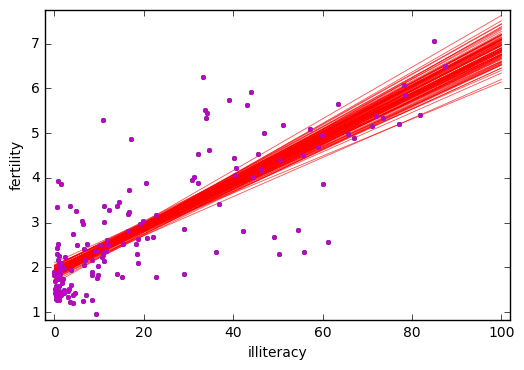

In [31]:
# Generate array of x-values for bootstrap lines: x
x = np.array([0,100])
# Plot the bootstrap lines
for i in range(100):
    _ = plt.plot(x, bs_slope_reps[i]*x + bs_intercept_reps[i],
                 linewidth=0.5, alpha=0.2, color='red')

# Plot the data
_ = plt.plot(illiteracy, fertility, marker = '.', linestyle = 'none')

# Label axes, set the margins, and show the plot
_ = plt.xlabel('illiteracy')
_ = plt.ylabel('fertility')
plt.margins(0.02)
plt.show()

In [32]:
# permutation sampling is a great way to simulate the hypothesis that two variables
# have identical probability distributions. This is often a hypothesis you want to test,
# so in this exercise, you will write a function to generate a permutation sample from two data sets.

# Remember, a permutation sample of two arrays having respectively n1 and n2 entries is
# constructed by concatenating the arrays together, scrambling the contents of the concatenated
# array, and then taking the first n1 entries as the permutation sample of the first array and
# the last n2 entries as the permutation sample of the second array.

def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1, data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

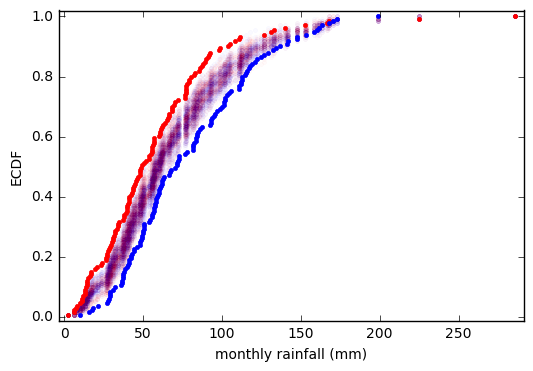

In [33]:
rain_july = array([  66.2,   39.7,   76.4,   26.5,   11.2,   61.8,    6.1,   48.4,
         89.2,  104. ,   34. ,   60.6,   57.1,   79.1,   90.9,   32.3,
         63.8,   78.2,   27.5,   43.4,   30.1,   17.3,   77.5,   44.9,
         92.2,   39.6,   79.4,   66.1,   53.5,   98.5,   20.8,   55.5,
         39.6,   56. ,   65.1,   14.8,   13.2,   88.1,    8.4,   32.1,
         19.6,   40.4,    2.2,   77.5,  105.4,   77.2,   38. ,   27.1,
        111.8,   17.2,   26.7,   23.3,   77.2,   87.2,   27.7,   50.6,
         60.3,   15.1,    6. ,   29.4,   39.3,   56.3,   80.4,   85.3,
         68.4,   72.5,   13.3,   28.4,   14.7,   37.4,   49.5,   57.2,
         85.9,   82.1,   31.8,  126.6,   30.7,   41.4,   33.9,   13.5,
         99.1,   70.2,   91.8,   61.3,   13.7,   54.9,   62.5,   24.2,
         69.4,   83.1,   44. ,   48.5,   11.9,   16.6,   66.4,   90. ,
         34.9,  132.8,   33.4,  225. ,    7.6,   40.9,   76.5,   48. ,
        140. ,   55.9,   54.1,   46.4,   68.6,   52.2,  108.3,   14.6,
         11.3,   29.8,  130.9,  152.4,   61. ,   46.6,   43.9,   30.9,
        111.1,   68.5,   42.2,    9.8,  285.6,   56.7,  168.2,   41.2,
         47.8,  166.6,   37.8,   45.4,   43.2])

rain_november = array([  83.6,   30.9,   62.2,   37. ,   41. ,  160.2,   18.2,  122.4,
         71.3,   44.2,   49.1,   37.6,  114.5,   28.8,   82.5,   71.9,
         50.7,   67.7,  112. ,   63.6,   42.8,   57.2,   99.1,   86.4,
         84.4,   38.1,   17.7,  102.2,  101.3,   58. ,   82. ,  101.4,
         81.4,  100.1,   54.6,   39.6,   57.5,   29.2,   48.8,   37.3,
        115.4,   55.6,   62. ,   95. ,   84.2,  118.1,  153.2,   83.4,
        104.7,   59. ,   46.4,   50. ,  147.6,   76.8,   59.9,  101.8,
        136.6,  173. ,   92.5,   37. ,   59.8,  142.1,    9.9,  158.2,
         72.6,   28. ,  112.9,  119.3,  199.2,   50.7,   44. ,  170.7,
         67.2,   21.4,   61.3,   15.6,  106. ,  116.2,   42.3,   38.5,
        132.5,   40.8,  147.5,   93.9,   71.4,   87.3,  163.7,  141.4,
         62.6,   84.9,   28.8,  121.1,   28.6,   32.4,  112. ,   50. ,
         96.9,   81.8,   70.4,  117.5,   41.2,  124.9,   78.2,   93. ,
         53.5,   50.5,   42.6,   47.9,   73.1,  129.1,   56.9,  103.3,
         60.5,  134.3,   93.1,   49.5,   48.2,  167.9,   27. ,  111.1,
         55.4,   36.2,   57.4,   66.8,   58.3,   60. ,  161.6,  112.7,
         37.4,  110.6,   56.6,   95.8,  126.8])

for i in range(50):
    # Generate permutation samples
    perm_sample_1, perm_sample_2 = permutation_sample(rain_july, rain_november)


    # Compute ECDFs
    x_1, y_1 = ecdf(perm_sample_1)
    x_2, y_2 = ecdf(perm_sample_2)

    # Plot ECDFs of permutation sample
    _ = plt.plot(x_1, y_1, marker='.', linestyle='none',
                 color='red', alpha=0.02)
    _ = plt.plot(x_2, y_2, marker='.', linestyle='none',
                 color='blue', alpha=0.02)

# Create and plot ECDFs from original data
x_1, y_1 = ecdf(rain_july)
x_2, y_2 = ecdf(rain_november)
_ = plt.plot(x_1, y_1, marker='.', linestyle='none', color='red')
_ = plt.plot(x_2, y_2, marker='.', linestyle='none', color='blue')

# Label axes, set margin, and show plot
plt.margins(0.02)
_ = plt.xlabel('monthly rainfall (mm)')
_ = plt.ylabel('ECDF')
plt.show()

# Notice that the permutation samples ECDFs overlap and give a purple haze. None of the ECDFs from 
# the permutation samples overlap with the observed data, suggesting that the hypothesis is not
# commensurate with the data. July and November rainfall are not identically distributed.


In [35]:
# The p-value is generally a measure of:

# the probability of observing a test statistic equally or more extreme than the one you
# observed, assuming the hypothesis you are testing is true.

# a permutation replicate is a single value of a statistic computed from a permutation sample.
# As the draw_bs_reps() function you wrote in chapter 2 is useful for you to generate bootstrap
# replicates, it is useful to have a similar function, draw_perm_reps(), to generate permutation
# replicates. You will write this useful function in this exercise.

# The function has call signature draw_perm_reps(data_1, data_2, func, size=1). Importantly, func 
# must be a function that takes two arrays as arguments. In most circumstances, func will be a
# function you write yourself.

def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)

    return perm_replicates

In [ ]:
# Kleinteich and Gorb (Sci. Rep., 4, 5225, 2014) performed an interesting experiment with
# South American horned frogs. They held a plate connected to a force transducer, along with
# a bait fly, in front of them. They then measured the impact force and adhesive force of the
# frog's tongue when it struck the target.

# Frog A is an adult and Frog B is a juvenile. The researchers measured the impact force of 20
# strikes for each frog. In the next exercise, we will test the hypothesis that the two frogs
# have the same distribution of impact forces. But, remember, it is important to do EDA first!
# Let's make a bee swarm plot for the data. They are stored in a Pandas data frame, df, where
# column ID is the identity of the frog and column impact_force is the impact force in Newtons (N).

'''
   ID  impact_force
20  A         1.612
21  A         0.605
22  A         0.327
23  A         0.946
24  A         0.541
25  A         1.539
26  A         0.529
27  A         0.628
28  A         1.453
29  A         0.297
30  A         0.703
31  A         0.269
32  A         0.751
33  A         0.245
34  A         1.182
35  A         0.515
36  A         0.435
37  A         0.383
38  A         0.457
39  A         0.730
60  B         0.172
61  B         0.142
62  B         0.037
63  B         0.453
64  B         0.355
65  B         0.022
66  B         0.502
67  B         0.273
68  B         0.720
69  B         0.582
70  B         0.198
71  B         0.198
72  B         0.597
73  B         0.516
74  B         0.815
75  B         0.402
76  B         0.605
77  B         0.711
78  B         0.614
79  B         0.468
'''


# Make bee swarm plot
_ = sns.swarmplot(x = 'ID', y = 'impact_force', data = df)

# Label axes
_ = plt.xlabel('frog')
_ = plt.ylabel('impact force (N)')

# Show the plot
plt.show()

In [36]:
force_a = array([ 1.612,  0.605,  0.327,  0.946,  0.541,  1.539,  0.529,  0.628,
        1.453,  0.297,  0.703,  0.269,  0.751,  0.245,  1.182,  0.515,
        0.435,  0.383,  0.457,  0.73 ])
force_b = array([ 0.172,  0.142,  0.037,  0.453,  0.355,  0.022,  0.502,  0.273,
        0.72 ,  0.582,  0.198,  0.198,  0.597,  0.516,  0.815,  0.402,
        0.605,  0.711,  0.614,  0.468])

def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1) - np.mean(data_2)

    return diff

# Compute difference of mean impact force from experiment: empirical_diff_means
empirical_diff_means = diff_of_means(force_a, force_b)

# Draw 10,000 permutation replicates: perm_replicates
perm_replicates = draw_perm_reps(force_a, force_b,
                                 diff_of_means, size=10000)

# Compute p-value: p
p = np.sum(perm_replicates >= empirical_diff_means) / len(perm_replicates)

# Print the result
print('p-value =', p)

# The p-value tells you that there is about a 0.6% chance that you would get the
# difference of means observed in the experiment if frogs were exactly the same. A p-value below
# 0.01 is typically said to be "statistically significant,", but: warning! warning! warning! You have
# computed a p-value; it is a number. I encourage you not to distill it to a yes-or-no phrase. p = 0.006 and
# p = 0.000000006 are both said to be "statistically significant," but they are definitely not the same!


p-value = 0.0057


In [37]:
# Another juvenile frog was studied, Frog C, and you want to see if Frog B and Frog C have
# similar impact forces. Unfortunately, you do not have Frog C's impact forces available, but
# you know they have a mean of 0.55 N. Because you don't have the original data, you cannot do
# a permutation test, and you cannot assess the hypothesis that the forces from Frog B and Frog C 
# come from the same distribution. You will therefore test another, less restrictive hypothesis:
# The mean strike force of Frog B is equal to that of Frog C.

# To set up the bootstrap hypothesis test, you will take the mean as our test statistic. Remember,
# your goal is to calculate the probability of getting a mean impact force less than or equal to
# what was observed for Frog B if the hypothesis that the true mean of Frog B's impact forces is equal
# to that of Frog C is true. You first translate all of the data of Frog B such that the mean is 0.55 N.
# This involves adding the mean force of Frog C and subtracting the mean force of Frog B 
# from each measurement of Frog B. This leaves other properties of Frog B's distribution, such as 
# the variance, unchanged.

force_b = array([ 0.172,  0.142,  0.037,  0.453,  0.355,  0.022,  0.502,  0.273,
        0.72 ,  0.582,  0.198,  0.198,  0.597,  0.516,  0.815,  0.402,
        0.605,  0.711,  0.614,  0.468])
mean_force_c = 0.55

# Make an array of translated impact forces: translated_force_b
translated_force_b = force_b - np.mean(force_b) + mean_force_c

# Take bootstrap replicates of Frog B's translated impact forces: bs_replicates
bs_replicates = draw_bs_reps(translated_force_b, np.mean, 10000)

# Compute fraction of replicates that are less than the observed Frog B force: p
p = np.sum(bs_replicates <= np.mean(force_b)) / 10000

# Print the p-value
print('p = ', p)

# The low p-value suggests that the null hypothesis that Frog B and Frog C have the same mean impact force is false.

p =  0.0046


In [38]:
# we can do two sample tests. We can even test the same hypothesis that we tested with a permutation test:
# that the Frog A and Frog B have identically distributed impact forces. To do this test on two arrays with
# n1 and n2 entries, we do a very similar procedure as a permutation test. We concatenate the arrays,
# generate a bootstrap sample from it, and take the first n1 entries of the bootstrap sample as belonging
# to the first data set and the last n2 as belonging to the second. We then compute the test statistic, e.g.,
# the difference of means, to get a bootstrap replicate. The p-value is the number of bootstrap replicates for
# which the test statistic is less than what was observed.

# Now, you will perform a bootstrap test of the hypothesis that Frog A and Frog B have identical distributions
# of impact forces using the difference of means test statistic.

# The two arrays are available to you as force_a and force_b.

# Compute difference of mean impact force from experiment: empirical_diff_means
empirical_diff_means = diff_of_means(force_a, force_b)

# Concatenate forces: forces_concat
forces_concat = np.concatenate((force_a, force_b))

# Initialize bootstrap replicates: bs_replicates
bs_replicates = np.empty(10000)

for i in range(10000):
    # Generate bootstrap sample
    bs_sample = np.random.choice(forces_concat, size=len(forces_concat))
    
    # Compute replicate
    bs_replicates[i] = diff_of_means(bs_sample[:len(force_a)],
                                     bs_sample[len(force_a):])

# Compute and print p-value: p
p = np.sum(bs_replicates >= empirical_diff_means) / len(bs_replicates)
print('p-value =', p)


# You may remember that we got p = 0.0063 from the permutation test, and here we got p = 0.0055.
# These are very close, and indeed the tests are testing the same thing. However, the permutation
# test exactly simulates the null hypothesis that the data come from the same distribution, whereas
# the bootstrap test approximately simulates it. As we will see, though, the bootstrap hypothesis test,
# while approximate, is more versatile.


p-value = 0.0075


In [45]:
# You performed a one-sample bootstrap hypothesis test, which is impossible to do with permutation.
# Testing the hypothesis that two samples have the same distribution may be done with a bootstrap test,
# but a permutation test is preferred because it is more accurate (exact, in fact). But therein lies
# the limit of a permutation test; it is not very versatile. We now want to test the hypothesis that
# Frog A and Frog B have the same mean impact force, but not necessarily the same distribution. This,
# too, is impossible with a permutation test.

# To do the two-sample bootstrap test, we shift both arrays to have the same mean, since we are
# simulating the hypothesis that their means are, in fact, equal. We then draw bootstrap samples 
# out of the shifted arrays and compute the difference in means. This constitutes a bootstrap replicate,
# and we generate many of them. The p-value is the fraction of replicates with a difference in means greater
# than or equal to what was observed.

# Compute mean of all forces: mean_force
mean_force = np.mean(forces_concat)

# Generate shifted arrays
force_a_shifted = force_a - np.mean(force_a) + mean_force
force_b_shifted = force_b - np.mean(force_b) + mean_force 

# Compute 10,000 bootstrap replicates from shifted arrays
bs_replicates_a = draw_bs_reps(force_a_shifted, np.mean, 10000)
bs_replicates_b = draw_bs_reps(force_b_shifted, np.mean, 10000)

# Get replicates of difference of means: bs_replicates
bs_replicates = bs_replicates_a - bs_replicates_b

# Compute and print p-value: p
p = np.sum(bs_replicates > diff_of_means(force_a, force_b)) / len(bs_replicates)
print('p-value =', p)



p-value = 0.0043


In [46]:
# The Civil Rights Act of 1964 was one of the most important pieces of legislation ever
# passed in the USA. Excluding "present" and "abstain" votes, 153 House Democrats and 136 Republicans
# voted yay. However, 91 Democrats and 35 Republicans voted nay. Did party affiliation make
# a difference in the vote?

# To answer this question, you will evaluate the hypothesis that the party of a House member
# has no bearing on his or her vote. You will use the fraction of Democrats voting in favor
# as your test statistic and evaluate the probability of observing a fraction of Democrats voting
# in favor at least as small as the observed fraction of 153/244. (That's right, at least as small as. 
# In 1964, it was the Democrats who were less progressive on civil rights issues.) To do this, permute
# the party labels of the House voters and then arbitrarily divide them into
# "Democrats" and "Republicans" and compute the fraction of Democrats voting yay.

# Construct arrays of data: dems, reps
dems = np.array([True] * 153 + [False] * 91)
reps = np.array([True] * 136 + [False] * 35)

def frac_yay_dems(dems, reps):
    """Compute fraction of Democrat yay votes."""
    frac = np.sum(dems) / len(dems)
    return frac

# Acquire permutation samples: perm_replicates
perm_replicates = draw_perm_reps(dems, reps, frac_yay_dems, 10000)

# Compute and print p-value: p
p = np.sum(perm_replicates <= 153/244) / len(perm_replicates)
print('p-value =', p)

# This small p-value suggests that party identity had a lot to do with the voting.
# Importantly, the South had a higher fraction of Democrat representatives, and consequently also a more racist bias.

p-value = 0.0001


In [ ]:
# Pretend you are working for a company that does all kinds of A/B tests on the user experience of its website.
# Which of the following situations has an equivalent set up for an A/B test as the one you just did
# with the Civil Rights Act of 1964?
# You measure the number of people who click on an ad on your company's website before and after changing its color.

# Yup! The "Democrats" are those who view the ad before the color change, and the "Republicans" 
# are those who view it after.


In [49]:
# It turns out that you already did a hypothesis test analogous to an A/B test where you are interested
# in how much time is spent on the website before and after an ad campaign. The frog tongue force
# (a continuous quantity like time on the website) is an analog. "Before" = Frog A and "after" = Frog B. 
# Let's practice this again with something that is actually a before/after scenario.

# We return to the no-hitter data set. In 1920, Major League Baseball implemented important rule changes
# that ended the so-called dead ball era. Importantly, the pitcher was no longer allowed to spit on or
# scuff the ball, an activity that greatly favors pitchers. In this problem you will perform an A/B test
# to determine if these rule changes resulted in a slower rate of no-hitters (i.e., longer average time
# between no-hitters) using the difference in mean inter-no-hitter time as your test statistic.
# The inter-no-hitter times for the respective eras are stored in the arrays nht_dead and nht_live,
# where "nht" is meant to stand for "no-hitter time."

# Since you will be using your draw_perm_reps() function in this exercise, it may be useful to remind
# yourself of its call signature: draw_perm_reps(d1, d2, func, size=1) or even referring back to the 
# chapter 3 exercise in which you defined it.



nht_dead = array([  -1,  894,   10,  130,    1,  934,   29,    6,  485,  254,  372,
         81,  191,  355,  180,  286,   47,  269,  361,  173,  246,  492,
        462, 1319,   58,  297,   31, 2970,  640,  237,  434,  570,   77,
        271,  563, 3365,   89,    0,  379,  221,  479,  367,  628,  843,
       1613, 1101,  215,  684,  814,  278,  324,  161,  219,  545,  715,
        966,  624,   29,  450,  107,   20,   91, 1325,  124, 1468,  104,
       1309,  429,   62, 1878, 1104,  123,  251,   93,  188,  983,  166,
         96,  702,   23,  524,   26,  299,   59,   39,   12,    2,  308,
       1114,  813,  887])

nht_live = array([ 645, 2088,   42, 2090,   11,  886, 1665, 1084, 2900, 2432,  750,
       4021, 1070, 1765, 1322,   26,  548, 1525,   77, 2181, 2752,  127,
       2147,  211,   41, 1575,  151,  479,  697,  557, 2267,  542,  392,
         73,  603,  233,  255,  528,  397, 1529, 1023, 1194,  462,  583,
         37,  943,  996,  480, 1497,  717,  224,  219, 1531,  498,   44,
        288,  267,  600,   52,  269, 1086,  386,  176, 2199,  216,   54,
        675, 1243,  463,  650,  171,  327,  110,  774,  509,    8,  197,
        136,   12, 1124,   64,  380,  811,  232,  192,  731,  715,  226,
        605,  539, 1491,  323,  240,  179,  702,  156,   82, 1397,  354,
        778,  603, 1001,  385,  986,  203,  149,  576,  445,  180, 1403,
        252,  675, 1351, 2983, 1568,   45,  899, 3260, 1025,   31,  100,
       2055, 4043,   79,  238, 3931, 2351,  595,  110,  215,    0,  563,
        206,  660,  242,  577,  179,  157,  192,  192, 1848,  792, 1693,
         55,  388,  225, 1134, 1172, 1555,   31, 1582, 1044,  378, 1687,
       2915,  280,  765, 2819,  511, 1521,  745, 2491,  580, 2072, 6450,
        578,  745, 1075, 1103, 1549, 1520,  138, 1202,  296,  277,  351,
        391,  950,  459,   62, 1056, 1128,  139,  420,   87,   71,  814,
        603, 1349,  162, 1027,  783,  326,  101,  876,  381,  905,  156,
        419,  239,  119,  129,  467])


# Compute the observed difference in mean inter-no-hitter times: nht_diff_obs
nht_diff_obs = diff_of_means(nht_dead, nht_live)

# Acquire 10,000 permutation replicates of difference in mean no-hitter time: perm_replicates
perm_replicates = draw_perm_reps(nht_dead, nht_live, diff_of_means, 10000)


# Compute and print the p-value: p
p = np.sum(perm_replicates <= nht_diff_obs) / len(perm_replicates)
print('p-val =',p)


# Your p-value if 0.0001, which means that only one out of your 10,000 replicates had a result
# as extreme as the actual difference between the dead ball and live ball eras. This suggests strong
# statistical significance. Watch out, though, you could very well have gotten zero replicates that were
# as extreme as the observed value. This just means that the p-value is quite small, almost certainly
# smaller than 0.001.

p-val = 0.0001


In [ ]:
# The observed correlation between female illiteracy and fertility in the data set of 162 countries may
# just be by chance; the fertility of a given country may actually be totally independent of its illiteracy.
# You will test this null hypothesis in the next exercise.

# To do the test, you need to simulate the data assuming the null hypothesis is true. Of the following choices,
# which is the best way to to do it?

# Do a permutation test: Permute the illiteracy values but leave the fertility values fixed to generate
# a new set of (illiteracy, fertility) data.
    
# Yes, this exactly simulates the null hypothesis and does so more efficiently than the last option. 
# It is exact because it uses all data and eliminates any correlation because which illiteracy value pairs
# to which fertility value is shuffled.


In [50]:
# The observed correlation between female illiteracy and fertility may just be by chance; the fertility
# of a given country may actually be totally independent of its illiteracy. You will test this hypothesis.
# To do so, permute the illiteracy values but leave the fertility values fixed. This simulates the hypothesis
# that they are totally independent of each other. For each permutation, compute the Pearson correlation
# coefficient and assess how many of your permutation replicates have a Pearson correlation coefficient 
# greater than the observed one.

def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x,y)

    # Return entry [0,1]
    return corr_mat[0,1]

# Compute observed correlation: r_obs
r_obs = pearson_r(illiteracy, fertility)

# Initialize permutation replicates: perm_replicates
perm_replicates = np.empty(10000)

# Draw replicates
for i in range(10000):
    # Permute illiteracy measurments: illiteracy_permuted
    illiteracy_permuted = np.random.permutation(illiteracy)

    # Compute Pearson correlation
    perm_replicates[i] = pearson_r(illiteracy_permuted, fertility)

# Compute p-value: p
p = np.sum(perm_replicates > r_obs) / len(perm_replicates)
print('p-val =', p)

# You got a p-value of zero. In hacker statistics, this means that your p-value is very low,
# since you never got a single replicate in the 10,000 you took that had a Pearson correlation
# greater than the observed one. You could try increasing the number of replicates you take to
# continue to move the upper bound on your p-value lower and lower.


p-val = 0.0


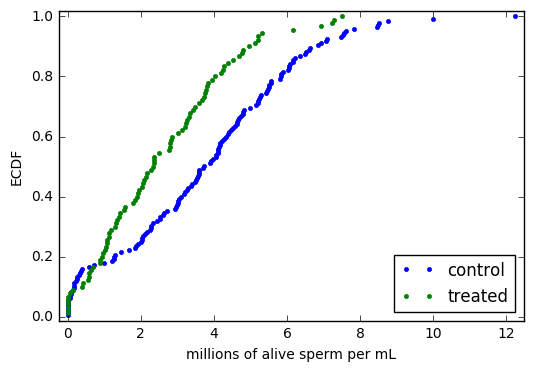

In [51]:
# In a recent study, Straub, et al. (Proc. Roy. Soc. B, 2016) investigated the effects of
# neonicotinoids on the sperm of pollenating bees. In this and the next exercise, you will study
# how the pesticide treatment affected the count of live sperm per half milliliter of semen.

# First, we will do EDA, as usual. Plot ECDFs of the alive sperm count for untreated bees
# (stored in the Numpy array control) and bees treated with pesticide (stored in the Numpy array treated).

control = array([  4.159234,   4.408002,   0.172812,   3.498278,   3.104912,
         5.164174,   6.615262,   4.633066,   0.170408,   2.65    ,
         0.0875  ,   1.997148,   6.92668 ,   4.574932,   3.896466,
         5.209814,   3.70625 ,   0.      ,   4.62545 ,   3.01444 ,
         0.732652,   0.4     ,   6.518382,   5.225   ,   6.218742,
         6.840358,   1.211308,   0.368252,   3.59937 ,   4.212158,
         6.052364,   2.115532,   6.60413 ,   5.26074 ,   6.05695 ,
         6.481172,   3.171522,   3.057228,   0.218808,   5.215112,
         4.465168,   2.28909 ,   3.732572,   2.17087 ,   1.834326,
         6.074862,   5.841978,   8.524892,   4.698492,   2.965624,
         2.324206,   3.409412,   4.830726,   0.1     ,   0.      ,
         4.101432,   3.478162,   1.009688,   4.999296,   4.32196 ,
         0.299592,   3.606032,   7.54026 ,   4.284024,   0.057494,
         6.036668,   2.924084,   4.150144,   1.256926,   4.666502,
         4.806594,   2.52478 ,   2.027654,   2.52283 ,   4.735598,
         2.033236,   0.      ,   6.177294,   2.601834,   3.544408,
         3.6045  ,   5.520346,   4.80698 ,   3.002478,   3.559816,
         7.075844,  10.      ,   0.139772,   6.17171 ,   3.201232,
         8.459546,   0.17857 ,   7.088276,   5.496662,   5.415086,
         1.932282,   3.02838 ,   7.47996 ,   1.86259 ,   7.838498,
         2.242718,   3.292958,   6.363644,   4.386898,   8.47533 ,
         4.156304,   1.463956,   4.533628,   5.573922,   1.29454 ,
         7.547504,   3.92466 ,   5.820258,   4.118522,   4.125   ,
         2.286698,   0.591882,   1.273124,   0.      ,   0.      ,
         0.      ,  12.22502 ,   7.601604,   5.56798 ,   1.679914,
         8.77096 ,   5.823942,   0.258374,   0.      ,   5.899236,
         5.486354,   2.053148,   3.25541 ,   2.72564 ,   3.364066,
         2.43427 ,   5.282548,   3.963666,   0.24851 ,   0.347916,
         4.046862,   5.461436,   4.066104,   0.      ,   0.065   ])

treated = array([ 1.342686,  1.058476,  3.793784,  0.40428 ,  4.528388,  2.142966,
        3.937742,  0.1375  ,  6.919164,  0.      ,  3.597812,  5.196538,
        2.78955 ,  2.3229  ,  1.090636,  5.323916,  1.021618,  0.931836,
        2.78    ,  0.412202,  1.180934,  2.8674  ,  0.      ,  0.064354,
        3.008348,  0.876634,  0.      ,  4.971712,  7.280658,  4.79732 ,
        2.084956,  3.251514,  1.9405  ,  1.566192,  0.58894 ,  5.219658,
        0.977976,  3.124584,  1.297564,  1.433328,  4.24337 ,  0.880964,
        2.376566,  3.763658,  1.918426,  3.74    ,  3.841726,  4.69964 ,
        4.386876,  0.      ,  1.127432,  1.845452,  0.690314,  4.185602,
        2.284732,  7.237594,  2.185148,  2.799124,  3.43218 ,  0.63354 ,
        1.142496,  0.586   ,  2.372858,  1.80032 ,  3.329306,  4.028804,
        3.474156,  7.508752,  2.032824,  1.336556,  1.906496,  1.396046,
        2.488104,  4.759114,  1.07853 ,  3.19927 ,  3.814252,  4.275962,
        2.817056,  0.552198,  3.27194 ,  5.11525 ,  2.064628,  0.      ,
        3.34101 ,  6.177322,  0.      ,  3.66415 ,  2.352582,  1.531696])

# Compute x,y values for ECDFs
x_control, y_control = ecdf(control)
x_treated, y_treated = ecdf(treated)

# Plot the ECDFs
plt.plot(x_control, y_control, marker='.', linestyle='none')
plt.plot(x_treated, y_treated, marker='.', linestyle='none')

# Set the margins
plt.margins(0.02)

# Add a legend
plt.legend(('control', 'treated'), loc='lower right')

# Label axes and show plot
plt.xlabel('millions of alive sperm per mL')
plt.ylabel('ECDF')
plt.show()

# The ECDFs show a pretty clear difference between the treatment and control; treated bees have
# fewer alive sperm. Let's now do a hypothesis test in the next exercise.

In [52]:
# Now, you will test the following hypothesis: On average, male bees treated with neonicotinoid
# insecticide have the same number of active sperm per milliliter of semen than do untreated
# male bees. You will use the difference of means as your test statistic.

# Compute the difference in mean sperm count: diff_means
diff_means = diff_of_means(control, treated)

# Compute mean of pooled data: mean_count
mean_count = np.mean(np.concatenate((control, treated)))

# Generate shifted data sets
control_shifted = control - np.mean(control) + mean_count
treated_shifted = treated - np.mean(treated) + mean_count

# Generate bootstrap replicates
bs_reps_control = draw_bs_reps(control_shifted,
                       np.mean, size=10000)
bs_reps_treated = draw_bs_reps(treated_shifted,
                       np.mean, size=10000)

# Get replicates of difference of means: bs_replicates
bs_replicates = bs_reps_control - bs_reps_treated

# Compute and print p-value: p
p = np.sum(bs_replicates >= np.mean(control) - np.mean(treated)) \
            / len(bs_replicates)
print('p-value =', p)


# The p-value is small, most likely less than 0.0001, since you never saw a bootstrap replicated
# with a difference of means at least as extreme as what was observed. In fact, when I did the
# calculation with 10 million replicates, I got a p-value of 2e-05.

p-value = 0.0


In [ ]:
# For your first foray into the Darwin finch data, you will study how the beak depth 
# (the distance, top to bottom, of a closed beak) of the finch species Geospiza scandens has changed over time.
# The Grants have noticed some changes of beak geometry depending on the types of seeds available on
# the island, and they also noticed that there was some interbreeding with another major species on 
# Daphne Major, Geospiza fortis. These effects can lead to changes in the species over time.

# In the next few problems, you will look at the beak depth of G. scandens on Daphne Major in 1975 and in 2012.
# To start with, let's plot all of the beak depth measurements in 1975 and 2012 in a bee swarm plot

'''
     beak_depth  year
0           8.4  1975
1           8.8  1975
2           8.4  1975
3           8.0  1975
4           7.9  1975
5           8.9  1975
6           8.6  1975
7           8.5  1975
8           8.9  1975
9           9.1  1975
10          8.6  1975
11          9.8  1975
12          8.2  1975
13          9.0  1975
14          9.7  1975
15          8.6  1975
16          8.2  1975
17          9.0  1975
18          8.4  1975
19          8.6  1975
20          8.9  1975
21          9.1  1975
22          8.3  1975
23          8.7  1975
24          9.6  1975
25          8.5  1975
26          9.1  1975
27          9.0  1975
28          9.2  1975
29          9.9  1975
..          ...   ...
184         8.4  2012
185         8.3  2012
186         9.6  2012
187         9.4  2012
188        10.0  2012
189         8.9  2012
190         9.1  2012
191         9.8  2012
192         9.3  2012
193         9.9  2012
194         8.9  2012
195         8.5  2012
196        10.6  2012
197         9.3  2012
198         8.9  2012
199         8.9  2012
200         9.7  2012
201         9.8  2012
202        10.5  2012
203         8.4  2012
204        10.0  2012
205         9.0  2012
206         8.7  2012
207         8.8  2012
208         8.4  2012
209         9.3  2012
210         9.8  2012
211         8.9  2012
212         9.8  2012
213         9.1  2012

[214 rows x 2 columns]
'''

# Create bee swarm plot
_ = sns.swarmplot(x = 'year', y = 'beak_depth', data = df)

# Label the axes
_ = plt.xlabel('year')
_ = plt.ylabel('beak depth (mm)')

# Show the plot
plt.show()


# It is kind of hard to see if there is a clear difference between the 1975 and 2012 data set.
# Eyeballing it, it appears as though the mean of the 2012 data set might be slightly higher,
# and it might have a bigger variance.

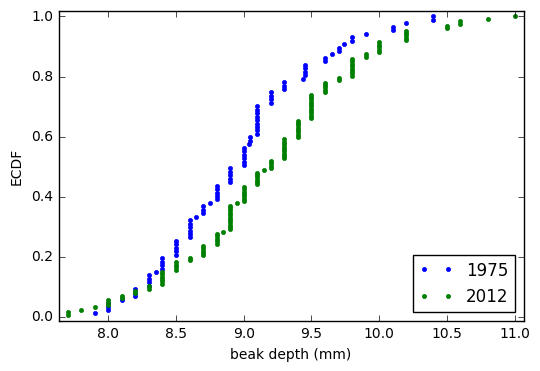

In [53]:
bd_1975 = array([  8.4 ,   8.8 ,   8.4 ,   8.  ,   7.9 ,   8.9 ,   8.6 ,   8.5 ,
         8.9 ,   9.1 ,   8.6 ,   9.8 ,   8.2 ,   9.  ,   9.7 ,   8.6 ,
         8.2 ,   9.  ,   8.4 ,   8.6 ,   8.9 ,   9.1 ,   8.3 ,   8.7 ,
         9.6 ,   8.5 ,   9.1 ,   9.  ,   9.2 ,   9.9 ,   8.6 ,   9.2 ,
         8.4 ,   8.9 ,   8.5 ,  10.4 ,   9.6 ,   9.1 ,   9.3 ,   9.3 ,
         8.8 ,   8.3 ,   8.8 ,   9.1 ,  10.1 ,   8.9 ,   9.2 ,   8.5 ,
        10.2 ,  10.1 ,   9.2 ,   9.7 ,   9.1 ,   8.5 ,   8.2 ,   9.  ,
         9.3 ,   8.  ,   9.1 ,   8.1 ,   8.3 ,   8.7 ,   8.8 ,   8.6 ,
         8.7 ,   8.  ,   8.8 ,   9.  ,   9.1 ,   9.74,   9.1 ,   9.8 ,
        10.4 ,   8.3 ,   9.44,   9.04,   9.  ,   9.05,   9.65,   9.45,
         8.65,   9.45,   9.45,   9.05,   8.75,   9.45,   8.35])

bd_2012 = array([  9.4 ,   8.9 ,   9.5 ,  11.  ,   8.7 ,   8.4 ,   9.1 ,   8.7 ,
        10.2 ,   9.6 ,   8.85,   8.8 ,   9.5 ,   9.2 ,   9.  ,   9.8 ,
         9.3 ,   9.  ,  10.2 ,   7.7 ,   9.  ,   9.5 ,   9.4 ,   8.  ,
         8.9 ,   9.4 ,   9.5 ,   8.  ,  10.  ,   8.95,   8.2 ,   8.8 ,
         9.2 ,   9.4 ,   9.5 ,   8.1 ,   9.5 ,   8.4 ,   9.3 ,   9.3 ,
         9.6 ,   9.2 ,  10.  ,   8.9 ,  10.5 ,   8.9 ,   8.6 ,   8.8 ,
         9.15,   9.5 ,   9.1 ,  10.2 ,   8.4 ,  10.  ,  10.2 ,   9.3 ,
        10.8 ,   8.3 ,   7.8 ,   9.8 ,   7.9 ,   8.9 ,   7.7 ,   8.9 ,
         9.4 ,   9.4 ,   8.5 ,   8.5 ,   9.6 ,  10.2 ,   8.8 ,   9.5 ,
         9.3 ,   9.  ,   9.2 ,   8.7 ,   9.  ,   9.1 ,   8.7 ,   9.4 ,
         9.8 ,   8.6 ,  10.6 ,   9.  ,   9.5 ,   8.1 ,   9.3 ,   9.6 ,
         8.5 ,   8.2 ,   8.  ,   9.5 ,   9.7 ,   9.9 ,   9.1 ,   9.5 ,
         9.8 ,   8.4 ,   8.3 ,   9.6 ,   9.4 ,  10.  ,   8.9 ,   9.1 ,
         9.8 ,   9.3 ,   9.9 ,   8.9 ,   8.5 ,  10.6 ,   9.3 ,   8.9 ,
         8.9 ,   9.7 ,   9.8 ,  10.5 ,   8.4 ,  10.  ,   9.  ,   8.7 ,
         8.8 ,   8.4 ,   9.3 ,   9.8 ,   8.9 ,   9.8 ,   9.1 ])


# Compute ECDFs
x_1975, y_1975 = ecdf(bd_1975)
x_2012, y_2012 = ecdf(bd_2012)

# Plot the ECDFs
_ = plt.plot(x_1975, y_1975, marker='.', linestyle='none')
_ = plt.plot(x_2012, y_2012, marker='.', linestyle='none')

# Set margins
plt.margins(0.02)

# Add axis labels and legend
_ = plt.xlabel('beak depth (mm)')
_ = plt.ylabel('ECDF')
_ = plt.legend(('1975', '2012'), loc='lower right')

# Show the plot
plt.show()

# The differences are much clearer in the ECDF. The mean is larger in the 2012 data, and
# the variance does appear larger as well.

In [55]:
# Estimate the difference of the mean beak depth of the G. scandens samples from 1975 and 2012
# and report a 95% confidence interval.

# Compute the difference of the sample means: mean_diff
mean_diff = diff_of_means(bd_2012, bd_1975)

# Get bootstrap replicates of means
bs_replicates_1975 = draw_bs_reps(bd_1975, np.mean, 10000)
bs_replicates_2012 = draw_bs_reps(bd_2012, np.mean, 10000)

# Compute samples of difference of means: bs_diff_replicates
bs_diff_replicates = bs_replicates_2012 - bs_replicates_1975

# Compute 95% confidence interval: conf_int
conf_int = np.percentile(bs_diff_replicates,[2.5, 97.5])

# Print the results
print('difference of means =', mean_diff, 'mm')
print('95% confidence interval =', conf_int, 'mm')

difference of means = 0.226220472441 mm
95% confidence interval = [ 0.05810347  0.39074418] mm


In [ ]:
# Your plot of the ECDF and determination of the confidence interval make it pretty clear that the beaks
# of G. scandens on Daphne Major have gotten deeper. But is it possible that this effect is just due
# to random chance? In other words, what is the probability that we would get the observed difference
# in mean beak depth if the means were the same?

# Be careful! The hypothesis we are testing is not that the beak depths come from the same distribution.
# For that we could use a permutation test. The hypothesis is that the means are equal. To perform this
# hypothesis test, we need to shift the two data sets so that they have the same mean and then use bootstrap
# sampling to compute the difference of means.

# Compute mean of combined data set: combined_mean
combined_mean = np.mean(np.concatenate((bd_1975, bd_2012)))

# Shift the samples
bd_1975_shifted = bd_1975 - np.mean(bd_1975) + combined_mean
bd_2012_shifted = bd_2012 - np.mean(bd_2012) + combined_mean

# Get bootstrap replicates of shifted data sets
bs_replicates_1975 = draw_bs_reps(bd_1975_shifted, np.mean, 10000)
bs_replicates_2012 = draw_bs_reps(bd_2012_shifted, np.mean, 10000)

# Compute replicates of difference of means: bs_diff_replicates
bs_diff_replicates = bs_replicates_2012 - bs_replicates_1975

# Compute the p-value
p = np.sum(bs_diff_replicates >= mean_diff) / len(bs_diff_replicates)

# Print p-value
print('p =', p)

# We get a p-value of 0.0034, which suggests that there is a statistically significant difference.
# But remember: it is very important to know how different they are! In the previous exercise, you
# got a difference of 0.2 mm between the means. You should combine this with the statistical significance.
# Changing by 0.2 mm in 37 years is substantial by evolutionary standards. If it kept changing at
# that rate, the beak depth would double in only 400 years.

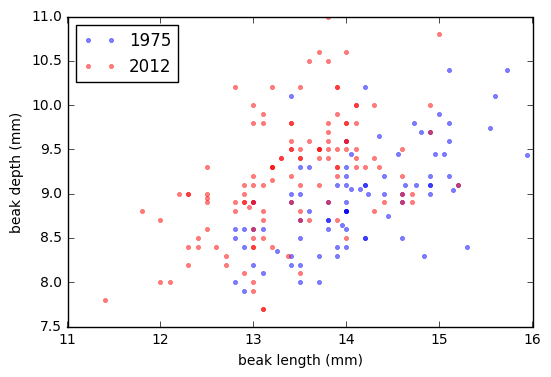

In [58]:
bl_1975 = array([ 13.9 ,  14.  ,  12.9 ,  13.5 ,  12.9 ,  14.6 ,  13.  ,  14.2 ,
        14.  ,  14.2 ,  13.1 ,  15.1 ,  13.5 ,  14.4 ,  14.9 ,  12.9 ,
        13.  ,  14.9 ,  14.  ,  13.8 ,  13.  ,  14.75,  13.7 ,  13.8 ,
        14.  ,  14.6 ,  15.2 ,  13.5 ,  15.1 ,  15.  ,  12.8 ,  14.9 ,
        15.3 ,  13.4 ,  14.2 ,  15.1 ,  15.1 ,  14.  ,  13.6 ,  14.  ,
        14.  ,  13.9 ,  14.  ,  14.9 ,  15.6 ,  13.8 ,  14.4 ,  12.8 ,
        14.2 ,  13.4 ,  14.  ,  14.8 ,  14.2 ,  13.5 ,  13.4 ,  14.6 ,
        13.5 ,  13.7 ,  13.9 ,  13.1 ,  13.4 ,  13.8 ,  13.6 ,  14.  ,
        13.5 ,  12.8 ,  14.  ,  13.4 ,  14.9 ,  15.54,  14.63,  14.73,
        15.73,  14.83,  15.94,  15.14,  14.23,  14.15,  14.35,  14.95,
        13.95,  14.05,  14.55,  14.05,  14.45,  15.05,  13.25])

bl_2012 = array([ 14.3 ,  12.5 ,  13.7 ,  13.8 ,  12.  ,  13.  ,  13.  ,  13.6 ,
        12.8 ,  13.6 ,  12.95,  13.1 ,  13.4 ,  13.9 ,  12.3 ,  14.  ,
        12.5 ,  12.3 ,  13.9 ,  13.1 ,  12.5 ,  13.9 ,  13.7 ,  12.  ,
        14.4 ,  13.5 ,  13.8 ,  13.  ,  14.9 ,  12.5 ,  12.3 ,  12.8 ,
        13.4 ,  13.8 ,  13.5 ,  13.5 ,  13.4 ,  12.3 ,  14.35,  13.2 ,
        13.8 ,  14.6 ,  14.3 ,  13.8 ,  13.6 ,  12.9 ,  13.  ,  13.5 ,
        13.2 ,  13.7 ,  13.1 ,  13.2 ,  12.6 ,  13.  ,  13.9 ,  13.2 ,
        15.  ,  13.37,  11.4 ,  13.8 ,  13.  ,  13.  ,  13.1 ,  12.8 ,
        13.3 ,  13.5 ,  12.4 ,  13.1 ,  14.  ,  13.5 ,  11.8 ,  13.7 ,
        13.2 ,  12.2 ,  13.  ,  13.1 ,  14.7 ,  13.7 ,  13.5 ,  13.3 ,
        14.1 ,  12.5 ,  13.7 ,  14.6 ,  14.1 ,  12.9 ,  13.9 ,  13.4 ,
        13.  ,  12.7 ,  12.1 ,  14.  ,  14.9 ,  13.9 ,  12.9 ,  14.6 ,
        14.  ,  13.  ,  12.7 ,  14.  ,  14.1 ,  14.1 ,  13.  ,  13.5 ,
        13.4 ,  13.9 ,  13.1 ,  12.9 ,  14.  ,  14.  ,  14.1 ,  14.7 ,
        13.4 ,  13.8 ,  13.4 ,  13.8 ,  12.4 ,  14.1 ,  12.9 ,  13.9 ,
        14.3 ,  13.2 ,  14.2 ,  13.  ,  14.6 ,  13.1 ,  15.2 ])


# Make scatter plot of 1975 data
_ = plt.plot(bl_1975, bd_1975, marker='.',
             linestyle='none', alpha = 0.5, color = 'blue')

# Make scatter plot of 2012 data
_ = plt.plot(bl_2012, bd_2012, marker='.',
             linestyle='none', alpha = 0.5, color = 'red')

# Label axes and make legend
_ = plt.xlabel('beak length (mm)')
_ = plt.ylabel('beak depth (mm)')
_ = plt.legend(('1975', '2012'), loc='upper left')

plt.show()

# we see that beaks got deeper (the red points are higher up in the y-direction), but not really longer.
# If anything, they got a bit shorter, since the red dots are to the left of the blue dots. So, it
# does not look like the beaks kept the same shape; they became shorter and deeper.

In [59]:
# Compute the linear regressions
slope_1975, intercept_1975 = np.polyfit(bl_1975, bd_1975, 1)
slope_2012, intercept_2012 = np.polyfit(bl_2012, bd_2012, 1)

# Perform pairs bootstrap for the linear regressions
bs_slope_reps_1975, bs_intercept_reps_1975 = \
        draw_bs_pairs_linreg(bl_1975, bd_1975, 1000)
bs_slope_reps_2012, bs_intercept_reps_2012 = \
        draw_bs_pairs_linreg(bl_2012, bd_2012, 1000)

# Compute confidence intervals of slopes
slope_conf_int_1975 = np.percentile(bs_slope_reps_1975, [2.5, 97.5])
slope_conf_int_2012 = np.percentile(bs_slope_reps_2012, [2.5, 97.5])
intercept_conf_int_1975 = np.percentile(bs_intercept_reps_1975, [2.5, 97.5])

intercept_conf_int_2012 = np.percentile(bs_intercept_reps_2012, [2.5, 97.5])


# Print the results
print('1975: slope =', slope_1975,
      'conf int =', slope_conf_int_1975)
print('1975: intercept =', intercept_1975,
      'conf int =', intercept_conf_int_1975)
print('2012: slope =', slope_2012,
      'conf int =', slope_conf_int_2012)
print('2012: intercept =', intercept_2012,
      'conf int =', intercept_conf_int_2012)

1975: slope = 0.465205169161 conf int = [ 0.33061645  0.5926128 ]
1975: intercept = 2.39087523658 conf int = [ 0.6229358   4.26869715]
2012: slope = 0.462630358835 conf int = [ 0.34055207  0.59745699]
2012: intercept = 2.97724749824 conf int = [ 1.184239    4.59461779]


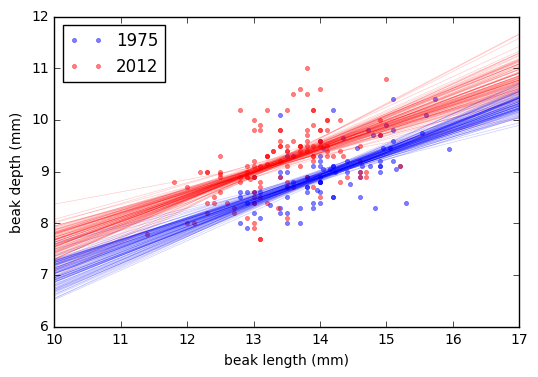

In [60]:
# Make scatter plot of 1975 data
_ = plt.plot(bl_1975, bd_1975, marker='.',
             linestyle='none', color='blue', alpha=0.5)

# Make scatter plot of 2012 data
_ = plt.plot(bl_2012, bd_2012, marker='.',
             linestyle='none', color='red', alpha=0.5)

# Label axes and make legend
_ = plt.xlabel('beak length (mm)')
_ = plt.ylabel('beak depth (mm)')
_ = plt.legend(('1975', '2012'), loc='upper left')

# Generate x-values for bootstrap lines: x
x = np.array([10, 17])

# Plot the bootstrap lines
for i in range(100):
    plt.plot(x, bs_slope_reps_1975[i] * x + bs_intercept_reps_1975[i],
             linewidth=0.5, alpha=0.2, color= 'blue')
    plt.plot(x, bs_slope_reps_2012[i] * x + bs_intercept_reps_2012[i],
             linewidth=0.5, alpha=0.2, color= 'red')

# Draw the plot again
plt.show()

In [61]:
# The linear regressions showed interesting information about the beak geometry. The slope was the
# same in 1975 and 2012, suggesting that for every millimeter gained in beak length, the birds gained
# about half a millimeter in depth in both years. However, if we are interested in the shape of the beak,
# we want to compare the ratio of beak length to beak depth. Let's make that comparison.

# Compute length-to-depth ratios
ratio_1975 = bl_1975 / bd_1975
ratio_2012 = bl_2012 / bd_2012

# Compute means
mean_ratio_1975 = np.mean(ratio_1975)
mean_ratio_2012 = np.mean(ratio_2012)

# Generate bootstrap replicates of the means
bs_replicates_1975 = draw_bs_reps(ratio_1975, np.mean, 10000)
bs_replicates_2012 = draw_bs_reps(ratio_2012, np.mean, 10000)

# Compute the 99% confidence intervals
conf_int_1975 = np.percentile(bs_replicates_1975, [0.5, 99.5])
conf_int_2012 = np.percentile(bs_replicates_2012, [0.5, 99.5])

# Print the results
print('1975: mean ratio =', mean_ratio_1975,
      'conf int =', conf_int_1975)
print('2012: mean ratio =', mean_ratio_2012,
      'conf int =', conf_int_2012)

1975: mean ratio = 1.57888237719 conf int = [ 1.55707705  1.60078552]
2012: mean ratio = 1.46583422768 conf int = [ 1.44432799  1.48745065]


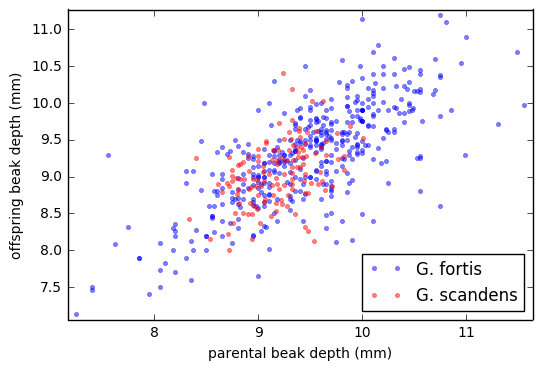

In [63]:
# The array bd_parent_scandens contains the average beak depth (in mm) of two parents of the
# species G. scandens. The array bd_offspring_scandens contains the average beak depth of the 
# offspring of the respective parents. The arrays bd_parent_fortis and bd_offspring_fortis contain 
# the same information about measurements from G. fortis birds.

bd_parent_fortis = array([ 10.1  ,   9.55 ,   9.4  ,  10.25 ,  10.125,   9.7  ,   9.05 ,
         7.4  ,   9.   ,   8.65 ,   9.625,   9.9  ,   9.55 ,   9.05 ,
         8.35 ,  10.1  ,  10.1  ,   9.9  ,  10.225,  10.   ,  10.55 ,
        10.45 ,   9.2  ,  10.2  ,   8.95 ,  10.05 ,  10.2  ,   9.5  ,
         9.925,   9.95 ,  10.05 ,   8.75 ,   9.2  ,  10.15 ,   9.8  ,
        10.7  ,  10.5  ,   9.55 ,  10.55 ,  10.475,   8.65 ,  10.7  ,
         9.1  ,   9.4  ,  10.3  ,   9.65 ,   9.5  ,   9.7  ,  10.525,
         9.95 ,  10.1  ,   9.75 ,  10.05 ,   9.9  ,  10.   ,   9.1  ,
         9.45 ,   9.25 ,   9.5  ,  10.   ,  10.525,   9.9  ,  10.4  ,
         8.95 ,   9.4  ,  10.95 ,  10.75 ,  10.1  ,   8.05 ,   9.1  ,
         9.55 ,   9.05 ,  10.2  ,  10.   ,  10.55 ,  10.75 ,   8.175,
         9.7  ,   8.8  ,  10.75 ,   9.3  ,   9.7  ,   9.6  ,   9.75 ,
         9.6  ,  10.45 ,  11.   ,  10.85 ,  10.15 ,  10.35 ,  10.4  ,
         9.95 ,   9.1  ,  10.1  ,   9.85 ,   9.625,   9.475,   9.   ,
         9.25 ,   9.1  ,   9.25 ,   9.2  ,   9.95 ,   8.65 ,   9.8  ,
         9.4  ,   9.   ,   8.55 ,   8.75 ,   9.65 ,   8.95 ,   9.15 ,
         9.85 ,  10.225,   9.825,  10.   ,   9.425,  10.4  ,   9.875,
         8.95 ,   8.9  ,   9.35 ,  10.425,  10.   ,  10.175,   9.875,
         9.875,   9.15 ,   9.45 ,   9.025,   9.7  ,   9.7  ,  10.05 ,
        10.3  ,   9.6  ,  10.   ,   9.8  ,  10.05 ,   8.75 ,  10.55 ,
         9.7  ,  10.   ,   9.85 ,   9.8  ,   9.175,   9.65 ,   9.55 ,
         9.9  ,  11.55 ,  11.3  ,  10.4  ,  10.8  ,   9.8  ,  10.45 ,
        10.   ,  10.75 ,   9.35 ,  10.75 ,   9.175,   9.65 ,   8.8  ,
        10.55 ,  10.675,   9.95 ,   9.55 ,   8.825,   9.7  ,   9.85 ,
         9.8  ,   9.55 ,   9.275,  10.325,   9.15 ,   9.35 ,   9.15 ,
         9.65 ,  10.575,   9.975,   9.55 ,   9.2  ,   9.925,   9.2  ,
         9.3  ,   8.775,   9.325,   9.175,   9.325,   8.975,   9.7  ,
         9.5  ,  10.225,  10.025,   8.2  ,   8.2  ,   9.55 ,   9.05 ,
         9.6  ,   9.6  ,  10.15 ,   9.875,  10.485,  11.485,  10.985,
         9.7  ,   9.65 ,   9.35 ,  10.05 ,  10.1  ,   9.9  ,   8.95 ,
         9.3  ,   9.95 ,   9.45 ,   9.5  ,   8.45 ,   8.8  ,   8.525,
         9.375,  10.2  ,   7.625,   8.375,   9.25 ,   9.4  ,  10.55 ,
         8.9  ,   8.8  ,   9.   ,   8.575,   8.575,   9.6  ,   9.375,
         9.6  ,   9.95 ,   9.6  ,  10.2  ,   9.85 ,   9.625,   9.025,
        10.375,  10.25 ,   9.3  ,   9.5  ,   9.55 ,   8.55 ,   9.05 ,
         9.9  ,   9.8  ,   9.75 ,  10.25 ,   9.1  ,   9.65 ,  10.3  ,
         8.9  ,   9.95 ,   9.5  ,   9.775,   9.425,   7.75 ,   7.55 ,
         9.1  ,   9.6  ,   9.575,   8.95 ,   9.65 ,   9.65 ,   9.65 ,
         9.525,   9.85 ,   9.05 ,   9.3  ,   8.9  ,   9.45 ,  10.   ,
         9.85 ,   9.25 ,  10.1  ,   9.125,   9.65 ,   9.1  ,   8.05 ,
         7.4  ,   8.85 ,   9.075,   9.   ,   9.7  ,   8.7  ,   9.45 ,
         9.7  ,   8.35 ,   8.85 ,   9.7  ,   9.45 ,  10.3  ,  10.   ,
        10.45 ,   9.45 ,   8.5  ,   8.3  ,  10.   ,   9.225,   9.75 ,
         9.15 ,   9.55 ,   9.   ,   9.275,   9.35 ,   8.95 ,   9.875,
         8.45 ,   8.6  ,   9.7  ,   8.55 ,   9.05 ,   9.6  ,   8.65 ,
         9.2  ,   8.95 ,   9.6  ,   9.15 ,   9.4  ,   8.95 ,   9.95 ,
        10.55 ,   9.7  ,   8.85 ,   8.8  ,  10.   ,   9.05 ,   8.2  ,
         8.1  ,   7.25 ,   8.3  ,   9.15 ,   8.6  ,   9.5  ,   8.05 ,
         9.425,   9.3  ,   9.8  ,   9.3  ,   9.85 ,   9.5  ,   8.65 ,
         9.825,   9.   ,  10.45 ,   9.1  ,   9.55 ,   9.05 ,  10.   ,
         9.35 ,   8.375,   8.3  ,   8.8  ,  10.1  ,   9.5  ,   9.75 ,
        10.1  ,   9.575,   9.425,   9.65 ,   8.725,   9.025,   8.5  ,
         8.95 ,   9.3  ,   8.85 ,   8.95 ,   9.8  ,   9.5  ,   8.65 ,
         9.1  ,   9.4  ,   8.475,   9.35 ,   7.95 ,   9.35 ,   8.575,
         9.05 ,   8.175,   9.85 ,   7.85 ,   9.85 ,  10.1  ,   9.35 ,
         8.85 ,   8.75 ,   9.625,   9.25 ,   9.55 ,  10.325,   8.55 ,
         9.675,   9.15 ,   9.   ,   9.65 ,   8.6  ,   8.8  ,   9.   ,
         9.95 ,   8.4  ,   9.35 ,  10.3  ,   9.05 ,   9.975,   9.975,
         8.65 ,   8.725,   8.2  ,   7.85 ,   8.775,   8.5  ,   9.4  ])

bd_offspring_fortis = array([ 10.7 ,   9.78,   9.48,   9.6 ,  10.27,   9.5 ,   9.  ,   7.46,
         7.65,   8.63,   9.81,   9.4 ,   9.48,   8.75,   7.6 ,  10.  ,
        10.09,   9.74,   9.64,   8.49,  10.15,  10.28,   9.2 ,  10.01,
         9.03,   9.94,  10.5 ,   9.7 ,  10.02,  10.04,   9.43,   8.1 ,
         9.5 ,   9.9 ,   9.48,  10.18,  10.16,   9.08,  10.39,   9.9 ,
         8.4 ,  10.6 ,   8.75,   9.46,   9.6 ,   9.6 ,   9.95,  10.05,
        10.16,  10.1 ,   9.83,   9.46,   9.7 ,   9.82,  10.34,   8.02,
         9.65,   9.87,   9.  ,  11.14,   9.25,   8.14,  10.23,   8.7 ,
         9.8 ,  10.54,  11.19,   9.85,   8.1 ,   9.3 ,   9.34,   9.19,
         9.52,   9.36,   8.8 ,   8.6 ,   8.  ,   8.5 ,   8.3 ,  10.38,
         8.54,   8.94,  10.  ,   9.76,   9.45,   9.89,  10.9 ,   9.91,
         9.39,   9.86,   9.74,   9.9 ,   9.09,   9.69,  10.24,   8.9 ,
         9.67,   8.93,   9.3 ,   8.67,   9.15,   9.23,   9.59,   9.03,
         9.58,   8.97,   8.57,   8.47,   8.71,   9.21,   9.13,   8.5 ,
         9.58,   9.21,   9.6 ,   9.32,   8.7 ,  10.46,   9.29,   9.24,
         9.45,   9.35,  10.19,   9.91,   9.18,   9.89,   9.6 ,  10.3 ,
         9.45,   8.79,   9.2 ,   8.8 ,   9.69,  10.61,   9.6 ,   9.9 ,
         9.26,  10.2 ,   8.79,   9.28,   8.83,   9.76,  10.2 ,   9.43,
         9.4 ,   9.9 ,   9.5 ,   8.95,   9.98,   9.72,   9.86,  11.1 ,
         9.14,  10.49,   9.75,  10.35,   9.73,   9.83,   8.69,   9.58,
         8.42,   9.25,  10.12,   9.31,   9.99,   8.59,   8.74,   8.79,
         9.6 ,   9.52,   8.93,  10.23,   9.35,   9.35,   9.09,   9.04,
         9.75,  10.5 ,   9.09,   9.05,   9.54,   9.3 ,   9.06,   8.7 ,
         9.32,   8.4 ,   8.67,   8.6 ,   9.53,   9.77,   9.65,   9.43,
         8.35,   8.26,   9.5 ,   8.6 ,   9.57,   9.14,  10.79,   8.91,
         9.93,  10.7 ,   9.3 ,   9.93,   9.51,   9.44,  10.05,  10.13,
         9.24,   8.21,   8.9 ,   9.34,   8.77,   9.4 ,   8.82,   8.83,
         8.6 ,   9.5 ,  10.2 ,   8.09,   9.07,   9.29,   9.1 ,  10.19,
         9.25,   8.98,   9.02,   8.6 ,   8.25,   8.7 ,   9.9 ,   9.65,
         9.45,   9.38,  10.4 ,   9.96,   9.46,   8.26,  10.05,   8.92,
         9.5 ,   9.43,   8.97,   8.44,   8.92,  10.3 ,   8.4 ,   9.37,
         9.91,  10.  ,   9.21,   9.95,   8.84,   9.82,   9.5 ,  10.29,
         8.4 ,   8.31,   9.29,   8.86,   9.4 ,   9.62,   8.62,   8.3 ,
         9.8 ,   8.48,   9.61,   9.5 ,   9.37,   8.74,   9.31,   9.5 ,
         9.49,   9.74,   9.2 ,   9.24,   9.7 ,   9.64,   9.2 ,   7.5 ,
         7.5 ,   8.7 ,   8.31,   9.  ,   9.74,   9.31,  10.5 ,   9.3 ,
         8.12,   9.34,   9.72,   9.  ,   9.65,   9.9 ,  10.  ,  10.1 ,
         8.  ,   9.07,   9.75,   9.33,   8.11,   9.36,   9.74,   9.9 ,
         9.23,   9.7 ,   8.2 ,   9.35,   9.49,   9.34,   8.87,   9.03,
         9.07,   9.43,   8.2 ,   9.19,   9.  ,   9.2 ,   9.06,   9.81,
         8.89,   9.4 ,  10.45,   9.64,   9.03,   8.71,   9.91,   8.33,
         8.2 ,   7.83,   7.14,   8.91,   9.18,   8.8 ,   9.9 ,   7.73,
         9.25,   8.7 ,   9.5 ,   9.3 ,   9.05,  10.18,   8.85,   9.24,
         9.15,   9.98,   8.77,   9.8 ,   8.65,  10.  ,   8.81,   8.01,
         7.9 ,   9.41,  10.18,   9.55,   9.08,   8.4 ,   9.75,   8.9 ,
         9.07,   9.35,   8.9 ,   8.19,   8.65,   9.19,   8.9 ,   9.28,
        10.58,   9.  ,   9.4 ,   8.91,   9.93,  10.  ,   9.37,   7.4 ,
         9.  ,   8.8 ,   9.18,   8.3 ,  10.08,   7.9 ,   9.96,  10.4 ,
         9.65,   8.8 ,   8.65,   9.7 ,   9.23,   9.43,   9.93,   8.47,
         9.55,   9.28,   8.85,   8.9 ,   8.75,   8.63,   9.  ,   9.43,
         8.28,   9.23,  10.4 ,   9.  ,   9.8 ,   9.77,   8.97,   8.37,
         7.7 ,   7.9 ,   9.5 ,   8.2 ,   8.8 ])


bd_parent_scandens = array([  8.3318,   8.4035,   8.5317,   8.7202,   8.7089,   8.7541,
         8.773 ,   8.8107,   8.7919,   8.8069,   8.6523,   8.6146,
         8.6938,   8.7127,   8.7466,   8.7504,   8.7805,   8.7428,
         8.7164,   8.8032,   8.8258,   8.856 ,   8.9012,   8.9125,
         8.8635,   8.8258,   8.8522,   8.8974,   8.9427,   8.9879,
         8.9615,   8.9238,   8.9351,   9.0143,   9.0558,   9.0596,
         8.9917,   8.905 ,   8.9314,   8.9465,   8.9879,   8.9804,
         9.0219,   9.052 ,   9.0407,   9.0407,   8.9955,   8.9992,
         8.9992,   9.0747,   9.0747,   9.5385,   9.4781,   9.4517,
         9.3537,   9.2707,   9.1199,   9.1689,   9.1425,   9.135 ,
         9.1011,   9.1727,   9.2217,   9.2255,   9.2821,   9.3235,
         9.3198,   9.3198,   9.3198,   9.3273,   9.3725,   9.3989,
         9.4253,   9.4593,   9.4442,   9.4291,   9.2632,   9.2293,
         9.1878,   9.1425,   9.1275,   9.1802,   9.1765,   9.2481,
         9.2481,   9.1991,   9.1689,   9.1765,   9.2406,   9.3198,
         9.3235,   9.1991,   9.2971,   9.2443,   9.316 ,   9.2934,
         9.3914,   9.3989,   9.5121,   9.6176,   9.5535,   9.4668,
         9.3725,   9.3348,   9.3763,   9.3839,   9.4216,   9.4065,
         9.3348,   9.4442,   9.4367,   9.5083,   9.448 ,   9.4781,
         9.595 ,   9.6101,   9.5686,   9.6365,   9.7119,   9.8213,
         9.825 ,   9.7609,   9.6516,   9.5988,   9.546 ,   9.6516,
         9.7572,   9.8854,  10.0023,   9.3914])

bd_offspring_scandens = array([  8.419 ,   9.2468,   8.1532,   8.0089,   8.2215,   8.3734,
         8.5025,   8.6392,   8.7684,   8.8139,   8.7911,   8.9051,
         8.9203,   8.8747,   8.943 ,   9.0038,   8.981 ,   9.0949,
         9.2696,   9.1633,   9.1785,   9.1937,   9.2772,   9.0722,
         8.9658,   8.9658,   8.5025,   8.4949,   8.4949,   8.5633,
         8.6013,   8.6468,   8.1532,   8.3734,   8.662 ,   8.6924,
         8.7456,   8.8367,   8.8595,   8.9658,   8.9582,   8.8671,
         8.8671,   8.943 ,   9.0646,   9.1405,   9.2089,   9.2848,
         9.3759,   9.4899,   9.4519,   8.1228,   8.2595,   8.3127,
         8.4949,   8.6013,   8.4646,   8.5329,   8.7532,   8.8823,
         9.0342,   8.6392,   8.6772,   8.6316,   8.7532,   8.8291,
         8.8975,   8.9734,   9.0494,   9.1253,   9.1253,   9.1253,
         9.1785,   9.2848,   9.4595,   9.3608,   9.2089,   9.2544,
         9.3684,   9.3684,   9.2316,   9.1709,   9.2316,   9.0342,
         8.8899,   8.8291,   8.981 ,   8.8975,  10.4089,  10.1886,
         9.7633,   9.7329,   9.6114,   9.5051,   9.5127,   9.3684,
         9.6266,   9.5354,  10.0215,  10.0215,   9.6266,   9.6038,
         9.4063,   9.2316,   9.338 ,   9.262 ,   9.262 ,   9.4063,
         9.4367,   9.0342,   8.943 ,   8.9203,   8.7835,   8.7835,
         9.057 ,   8.9354,   8.8975,   8.8139,   8.8671,   9.0873,
         9.2848,   9.2392,   9.2924,   9.4063,   9.3152,   9.4899,
         9.5962,   9.6873,   9.5203,   9.6646])

# Make scatter plots
_ = plt.plot(bd_parent_fortis, bd_offspring_fortis,
             marker='.', linestyle='none', color='blue', alpha=0.5)
_ = plt.plot(bd_parent_scandens, bd_offspring_scandens,
             marker='.', linestyle='none', color='red', alpha=0.5)

# Set margins
plt.margins(0.02)

# Label axes
_ = plt.xlabel('parental beak depth (mm)')
_ = plt.ylabel('offspring beak depth (mm)')

# Add legend
_ = plt.legend(('G. fortis', 'G. scandens'), loc='lower right')

# Show plot
plt.show()


# It appears as though there is a stronger correlation in G. fortis than in G. scandens.
# This suggests that beak depth is more strongly inherited in G. fortis. We'll quantify this correlation next.

In [71]:
# In an effort to quantify the correlation between offspring and parent beak depths, we would
# like to compute statistics, such as the Pearson correlation coefficient, between parents and
# offspring. To get confidence intervals on this, we need to do a pairs bootstrap.

def draw_bs_pairs(x, y, func, size=1):
    """Perform pairs bootstrap for linear regression."""

    # Set up array of indices to sample from: inds
    inds = np.arange(len(x))

    # Initialize replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_replicates = func(bs_x, bs_y)
    
    return bs_replicates

In [72]:
# The Pearson correlation coefficient seems like a useful measure of how strongly the beak depth
# of parents are inherited by their offspring. Compute the Pearson correlation coefficient between
# parental and offspring beak depths for G. scandens. Do the same for G. fortis. Then, use the function
# you wrote in the last exercise to compute a 95% confidence interval using pairs bootstrap.

# Compute the Pearson correlation coefficients
r_scandens = pearson_r(bd_parent_scandens, bd_offspring_scandens)
r_fortis = pearson_r(bd_parent_fortis, bd_offspring_fortis)

# Acquire 1000 bootstrap replicates of Pearson r
bs_replicates_scandens = draw_bs_pairs(bd_parent_scandens, bd_offspring_scandens, pearson_r, 1000)

bs_replicates_fortis = draw_bs_pairs(bd_parent_fortis, bd_offspring_fortis, pearson_r, 1000)


# Compute 95% confidence intervals
conf_int_scandens = np.percentile(bs_replicates_scandens, [2.5, 97.5])
conf_int_fortis = np.percentile(bs_replicates_fortis, [2.5, 97.5])

# Print results
print('G. scandens:', r_scandens, conf_int_scandens)
print('G. fortis:', r_fortis, conf_int_fortis)


G. scandens: 0.41170636294 [ 0.43363602  0.43363602]
G. fortis: 0.728341239552 [ 0.71930112  0.71930112]


In [73]:
# Remember that the Pearson correlation coefficient is the ratio of the covariance to the geometric mean
# of the variances of the two data sets. This is a measure of the correlation between parents and offspring,
# but might not be the best estimate of heritability. If we stop and think, it makes more sense to define
# heritability as the ratio of the covariance between parent and offspring to the variance of the parents alone.
# In this exercise, you will estimate the heritability and perform a pairs bootstrap calculation to get the
# 95% confidence interval.

# This exercise highlights a very important point. Statistical inference (and data analysis in general)
# is not a plug-n-chug enterprise. You need to think carefully about the questions you are seeking to answer
# with your data and analyze them appropriately. If you are interested in how heritable traits are, the quantity
# we defined as the heritability is more apt than the off-the-shelf statistic, the Pearson correlation coefficient.


def heritability(parents, offspring):
    """Compute the heritability from parent and offspring samples."""
    covariance_matrix = np.cov(parents, offspring)
    return covariance_matrix[0,1] / covariance_matrix[0,0]

# Compute the heritability
heritability_scandens = heritability(bd_parent_scandens,bd_offspring_scandens)
heritability_fortis = heritability(bd_parent_fortis, bd_offspring_fortis)

# Acquire 1000 bootstrap replicates of heritability
replicates_scandens = draw_bs_pairs(
        bd_parent_scandens, bd_offspring_scandens, heritability, size=1000)
        
replicates_fortis = draw_bs_pairs(
        bd_parent_fortis, bd_offspring_fortis, heritability, size=1000)


# Compute 95% confidence intervals
conf_int_scandens = np.percentile(replicates_scandens,[2.5,97.5])
conf_int_fortis = np.percentile(replicates_fortis, [2.5, 97.5])

# Print results
print('G. scandens:', heritability_scandens, conf_int_scandens)
print('G. fortis:', heritability_fortis, conf_int_fortis)


G. scandens: 0.548534086869 [ 0.64223456  0.64223456]
G. fortis: 0.722905191144 [ 0.73997957  0.73997957]


In [70]:
# The heritability of beak depth in G. scandens seems low. It could be that this observed heritability
# was just achieved by chance and beak depth is actually not really heritable in the species. You will
# test that hypothesis here. To do this, you will do a pairs permutation test.

# Initialize array of replicates: perm_replicates
perm_replicates = np.empty(10000)

# Draw replicates
for i in range(10000):
    # Permute parent beak depths
    bd_parent_permuted = np.random.permutation(bd_parent_scandens)
    perm_replicates[i] = heritability(bd_parent_permuted,bd_offspring_scandens)


# Compute p-value: p
p = np.sum(perm_replicates >= heritability_scandens) / len(perm_replicates)

# Print the p-value
print('p-val =', p)


# You get a p-value of zero, which means that none of the 10,000 permutation pairs replicates you drew 
# had a heritability high enough to match that which was observed. This strongly suggests that beak depth
# is heritable in G. scandens, just not as much as in G. fortis. If you like, you can plot a histogram
# of the heritability replicates to get a feel for how extreme of a value of heritability you might expect by chance.

p-val = 0.0
